<a href="https://colab.research.google.com/github/alexjreynolds50/PGA-TOUR-DRIVING-DISTANCE-ANALYSIS/blob/main/Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2017 PGA Tour Data Analysis on Importance of Driving Distance

##Import Libraries and Dataset into Notebook

Dataset found on Kaggle.com

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Import dataset into notebook

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/PGATOUR_meta2.csv')

##Hypotheses


*   H1 = Players with higher average driving distance will have more success on PGA including more wins, top 10s, and money earned.

---


*   H2 = Players with higher average driving distance will have better strokes gained statistics

---


*   H3 = Players with higher average driving distance will have lower scoring averages


##Exploratory Dataset Analysis and Wrangle


Includes 195 players and 71 columns

In [5]:
df.shape

(195, 71)

Columns in dataset

In [6]:
df.columns

Index(['Player', 'EVENTS_PLAYED', 'POINTS', 'NUMBER_OF_WINS',
       'NUMBER_OF_TOP_Tens', 'POINTS_BEHIND_LEAD', 'ROUNDS_PLAYED',
       'SG_PUTTING_PER_ROUND', 'TOTAL_SG:PUTTING', 'MEASURED_ROUNDS',
       'AVG_Driving_DISTANCE', 'UP_AND_DOWN_%', 'PAR_OR_BETTER', 'MISSED_GIR',
       'FAIRWAY_HIT_%', 'FAIRWAYS_HIT', 'POSSIBLE_FAIRWAYS', 'GIR_RANK',
       'GOING_FOR_GREEN_IN_2%', 'ATTEMPTS_GFG', 'NON-ATTEMPTS_GFG',
       'RTP-GOING_FOR_THE_GREEN', 'RTP-NOT_GOING_FOR_THE_GRN', 'HOLE_OUTS',
       'SAND_SAVE%', 'NUMBER_OF_SAVES', 'NUMBER_OF_BUNKERS', 'TOTAL_O/U_PAR',
       'Three_PUTT%', 'TOTAL_3_PUTTS', 'SG_PER_ROUND', 'SG:OTT', 'SG:APR',
       'SG:ARG', 'DRIVES_320+%', 'TOTAL_DRIVES_FOR_320+', 'TOTAL_DRIVES',
       'ROUGH_TENDNECY%', 'TOTAL_ROUGH', 'FAIRWAY_BUNKER%',
       'TOTAL_FAIRWAY_BUNKERS', 'AVG_CLUB_HEAD_SPEED', 'FASTEST_CH_SPEED',
       'SLOWEST_CH_SPEED', 'AVG_BALL_SPEED', 'FASTEST_BALL_SPEED',
       'SLOWEST_BALL_SPEED', 'AVG_SMASH_FACTOR', 'HIGHEST_SF', 'LOWEST_SF',

Look at dtypes of columns and quick look at null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 71 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player                     195 non-null    object 
 1   EVENTS_PLAYED              195 non-null    int64  
 2   POINTS                     195 non-null    int64  
 3   NUMBER_OF_WINS             195 non-null    int64  
 4   NUMBER_OF_TOP_Tens         195 non-null    int64  
 5   POINTS_BEHIND_LEAD         194 non-null    float64
 6   ROUNDS_PLAYED              195 non-null    int64  
 7   SG_PUTTING_PER_ROUND       195 non-null    float64
 8   TOTAL_SG:PUTTING           195 non-null    float64
 9   MEASURED_ROUNDS            195 non-null    int64  
 10  AVG_Driving_DISTANCE       195 non-null    float64
 11  UP_AND_DOWN_%              195 non-null    float64
 12  PAR_OR_BETTER              195 non-null    int64  
 13  MISSED_GIR                 195 non-null    int64  

All data is int64 or float64 except PLAYER, COUNTRY, FAIRWAYS_HIT, and TOTAL_DRIVES

Will need to convert FAIRWAYS_HIT and TOTAL_DRIVES to int64 for analysis

In [85]:
df.FAIRWAYS_HIT.max()

1060

In [86]:
df.TOTAL_DRIVES.max()

1344

Both FAIRWAY_HIT and TOTAL_DRIVES have values greater than 1000 and contain commas leading to object dtypes. 

Lets remove commas and changes to int64 dtypes

In [10]:
df.FAIRWAYS_HIT = df.FAIRWAYS_HIT.str.replace(',','')
df.FAIRWAYS_HIT = df.FAIRWAYS_HIT.astype('int64')
df.TOTAL_DRIVES = df.TOTAL_DRIVES.str.replace(',','')
df.TOTAL_DRIVES = df.TOTAL_DRIVES.astype('int64')

In [11]:
df.FAIRWAYS_HIT.dtypes
df.TOTAL_DRIVES.dtypes

dtype('int64')

All appropriate columns converted to int64 dtypes for analysis

5 row sample of dataset

In [12]:
df.sample(5)

,Player,EVENTS_PLAYED,POINTS,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,POINTS_BEHIND_LEAD,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,AVG_Driving_DISTANCE,UP_AND_DOWN_%,PAR_OR_BETTER,MISSED_GIR,FAIRWAY_HIT_%,FAIRWAYS_HIT,POSSIBLE_FAIRWAYS,GIR_RANK,GOING_FOR_GREEN_IN_2%,ATTEMPTS_GFG,NON-ATTEMPTS_GFG,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,HOLE_OUTS,SAND_SAVE%,NUMBER_OF_SAVES,NUMBER_OF_BUNKERS,TOTAL_O/U_PAR,Three_PUTT%,TOTAL_3_PUTTS,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,DRIVES_320+%,TOTAL_DRIVES_FOR_320+,TOTAL_DRIVES,ROUGH_TENDNECY%,TOTAL_ROUGH,FAIRWAY_BUNKER%,TOTAL_FAIRWAY_BUNKERS,AVG_CLUB_HEAD_SPEED,FASTEST_CH_SPEED,SLOWEST_CH_SPEED,AVG_BALL_SPEED,FASTEST_BALL_SPEED,SLOWEST_BALL_SPEED,AVG_SMASH_FACTOR,HIGHEST_SF,LOWEST_SF,AVG_LAUNCH_ANGLE,LOWEST_LAUNCH_ANGLE,STEEPEST_LAUNCH_ANGLE,AVG_SPIN_RATE,HIGHEST_SPIN_RATE,LOWEST_SPIN_RATE,AVG_HANG_TIME,LONGEST_ACT.HANG_TIME,SHORTEST_ACT.HANG_TIME,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE,MONEY,COUNTRY
33,Bubba Watson,22,2277,3,6,3340.0,82,-0.033,-1.924,58,313.6,57.18,219,383,58.43,565,967,34,71.43,155,62,-99,-8,11,47.01,55,117,34,2.44,33,0.820,0.861,0.092,-0.133,31.22,271,868,30.92,265,6.7,57,121.22,125.56,118.02,181.33,185.26,176.88,1.496,1.520,1.431,12.30,9.84,15.32,2864.5,5924,1773,6.6,8.5,1.0,294.4,323.2,259.5,70.250,5246,75,15.33,207,1350,39,5503948,United States
143,Ricky Barnes,22,164,0,1,5453.0,65,0.338,15.195,45,290.6,57.40,221,385,47.15,389,825,156,50.60,85,83,-61,-1,11,51.65,47,91,30,2.45,26,-0.703,-1.019,0.059,0.257,3.33,21,630,42.35,260,4.1,25,116.94,121.06,113.64,169.94,174.61,165.63,1.453,1.517,1.412,10.24,6.79,13.66,2427.3,3026,1914,5.5,6.9,2.6,268.5,293.5,241.8,71.663,4179,59,17.70,188,1062,39,340591,United States
146,Robert Streb,29,155,0,1,5462.0,78,-0.081,-4.830,60,292.6,52.89,247,467,54.11,559,1033,135,50.24,105,104,-59,-7,9,45.00,63,140,70,2.78,37,-0.500,-0.680,0.096,0.084,5.73,48,838,32.13,267,8.5,71,115.13,118.73,111.73,171.43,175.51,163.17,1.489,1.515,1.406,10.13,6.12,13.90,2864.9,4048,2000,6.2,8.4,4.0,270.3,293.4,239.8,71.905,5301,74,18.84,251,1332,34,411606,United States
139,Rafa Cabrera Bello,19,1121,0,5,4496.0,71,0.146,5.828,40,295.6,57.85,188,325,67.05,584,871,7,58.87,83,58,-57,-7,4,55.45,56,101,31,3.17,40,1.136,0.348,0.693,0.094,7.79,48,616,25.57,157,4.9,30,112.17,115.08,110.01,167.46,171.91,163.52,1.493,1.510,1.473,10.36,7.46,13.43,2488.3,5116,1727,6.1,7.0,4.3,271.3,297.6,245.0,69.887,4898,70,15.48,195,1260,36,2415669,Spain
93,Jonathan Byrd,24,147,0,0,5470.0,70,-0.106,-5.087,48,291.7,58.31,207,355,58.59,508,867,58,57.89,99,72,-59,-3,8,57.65,49,85,21,3.14,35,-0.160,-0.542,0.043,0.339,4.76,32,672,28.87,192,7.5,50,111.51,115.61,107.89,166.28,170.00,161.16,1.491,1.516,1.435,11.23,5.67,14.92,2646.5,4639,1622,6.4,7.9,4.5,276.2,302.8,241.1,71.398,4382,62,15.77,176,1116,38,267055,United States


Descriptive Statistics across all columns

In [13]:
df.describe()

,EVENTS_PLAYED,POINTS,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,POINTS_BEHIND_LEAD,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,AVG_Driving_DISTANCE,UP_AND_DOWN_%,PAR_OR_BETTER,MISSED_GIR,FAIRWAY_HIT_%,FAIRWAYS_HIT,POSSIBLE_FAIRWAYS,GIR_RANK,GOING_FOR_GREEN_IN_2%,ATTEMPTS_GFG,NON-ATTEMPTS_GFG,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,HOLE_OUTS,SAND_SAVE%,NUMBER_OF_SAVES,NUMBER_OF_BUNKERS,TOTAL_O/U_PAR,Three_PUTT%,TOTAL_3_PUTTS,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,DRIVES_320+%,TOTAL_DRIVES_FOR_320+,TOTAL_DRIVES,ROUGH_TENDNECY%,TOTAL_ROUGH,FAIRWAY_BUNKER%,TOTAL_FAIRWAY_BUNKERS,AVG_CLUB_HEAD_SPEED,FASTEST_CH_SPEED,SLOWEST_CH_SPEED,AVG_BALL_SPEED,FASTEST_BALL_SPEED,SLOWEST_BALL_SPEED,AVG_SMASH_FACTOR,HIGHEST_SF,LOWEST_SF,AVG_LAUNCH_ANGLE,LOWEST_LAUNCH_ANGLE,STEEPEST_LAUNCH_ANGLE,AVG_SPIN_RATE,HIGHEST_SPIN_RATE,LOWEST_SPIN_RATE,AVG_HANG_TIME,LONGEST_ACT.HANG_TIME,SHORTEST_ACT.HANG_TIME,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE,MONEY
count,195.000000,195.000000,195.000000,195.000000,194.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.00000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02
mean,24.174359,745.974359,0.241026,2.651282,4896.262887,78.358974,0.051708,3.111672,59.928205,296.756923,58.597897,256.615385,437.887179,61.053846,620.907692,1015.025641,97.923077,56.224821,124.148718,96.692308,-67.748718,-6.779487,10.994872,49.934462,61.984615,124.164103,40.189744,2.866923,38.815385,0.136246,0.042308,0.061779,0.032108,10.817179,92.230769,859.584615,28.773949,243.964103,6.109744,52.128205,113.997846,118.370051,110.116872,169.622667,174.298513,163.605231,1.487728,1.515636,1.431810,11.060974,7.00041,14.887333,2633.989744,5085.112821,1736.723077,6.347179,7.638462,3.209744,278.155385,305.030769,244.854359,70.893369,5328.810256,75.497436,16.483897,222.194872,1359.000000,32.887179,1.653204e+06
std,4.151805,700.518059,0.599277,2.201554,608.024609,14.039134,0.313897,18.320074,13.997606,8.191270,3.473569,53.353816,86.863725,5.079533,139.350784,201.438703,56.456709,9.138289,34.816950,31.008108,21.775647,9.887907,4.345275,5.791218,16.237121,29.040742,13.129407,0.642765,10.674991,0.752243,0.418211,0.396112,0.220894,6.999289,62.617256,195.369058,3.939820,59.698329,1.105403,15.032575,3.902298,4.183791,3.819907,5.764802,5.814774,6.076666,0.014070,0.005842,0.026439,1.382925,1.63012,1.631474,209.331951,1364.666542,219.316194,0.252676,0.331985,1.155827,10.060564,12.552019,13.149478,0.820646,1005.287126,14.465520,2.095008,41.704446,260.378571,5.668469,1.489543e+06
min,15.000000,10.000000,0.000000,0.000000,2328.000000,46.000000,-0.750000,-42.673000,30.000000,278.400000,44.010000,136.000000,227.000000,40.850000,268.000000,531.000000,1.000000,28.360000,38.000000,35.000000,-128.000000,-51.000000,1.000000,33.800000,23.000000,57.000000,15.000000,1.480000,12.000000,-3.586000,-1.585000,-1.586000,-0.924000,1.240000,8.000000,420.000000,16.670000,93.000000,3.100000,18.000000,105.270000,109.160000,102.150000,157.170000,160.260000,146.500000,1.423000,1.473000,1.337000,7.140000,1.25000,10.700000,2127.300000,2819.000000,1400.000000,5.500000,6.800000,0.500000,249.800000,271.600000,192.800000,68.702000,3261.000000,45.000000,12.200000,123.000000,810.000000,21.000000,2.487800e+04
25%,21.000000,267.500000,0.000000,1.000000,4592.750000,67.000000,-0.14650

Assess for null/empty values

In [14]:
num_na = df.isna().sum()
num_null = df.isnull().sum()
sort_num_na = num_na.sort_values(ascending=False)
sort_num_null = num_null.sort_values(ascending=False)
print(sort_num_na)
print(sort_num_null)

POINTS_BEHIND_LEAD    1
COUNTRY               0
NUMBER_OF_SAVES       0
ATTEMPTS_GFG          0
NON-ATTEMPTS_GFG      0
                     ..
AVG_SMASH_FACTOR      0
HIGHEST_SF            0
LOWEST_SF             0
AVG_LAUNCH_ANGLE      0
Player                0
Length: 71, dtype: int64
POINTS_BEHIND_LEAD    1
COUNTRY               0
NUMBER_OF_SAVES       0
ATTEMPTS_GFG          0
NON-ATTEMPTS_GFG      0
                     ..
AVG_SMASH_FACTOR      0
HIGHEST_SF            0
LOWEST_SF             0
AVG_LAUNCH_ANGLE      0
Player                0
Length: 71, dtype: int64


Only empty value has no consequence to analysis

##EDA of driving distance statistics

Descriptive Statistics of average driving distance column

In [15]:
df.AVG_Driving_DISTANCE.describe()

count    195.000000
mean     296.756923
std        8.191270
min      278.400000
25%      291.050000
50%      296.200000
75%      301.650000
max      320.200000
Name: AVG_Driving_DISTANCE, dtype: float64

Separate data into groups based on average driving distance for future analysis

Group 1: Over 300 yard average driving distance 

Group 2: Under 300 yard average driving distance 

Group 3: Top 50% average driving distance

Group 4: Bottom 50% average driving distance 

In [16]:
over_300_avg_driving_dist = df.AVG_Driving_DISTANCE >= 300
under_300_avg_driving_dist = df.AVG_Driving_DISTANCE < 300
top_50_driving_dist = df.AVG_Driving_DISTANCE >= 296.20
bottom_50_driving_dist = df.AVG_Driving_DISTANCE <= 296.20

Create new column for over 300 yard and top 50% drivers for future analysis

In [17]:
df['Over_300_yards']=over_300_avg_driving_dist
df['Top_50']=top_50_driving_dist

Create new dataframes for new groups

In [18]:
over_300_df = df.iloc[over_300_avg_driving_dist.values]
under_300_df = df.iloc[under_300_avg_driving_dist.values]
top_50_df = df.iloc[top_50_driving_dist.values]
bottom_50_df = df.iloc[bottom_50_driving_dist.values]

In [19]:
over_300_df.count()

Player                62
EVENTS_PLAYED         62
POINTS                62
NUMBER_OF_WINS        62
NUMBER_OF_TOP_Tens    62
                      ..
AGE                   62
MONEY                 62
COUNTRY               62
Over_300_yards        62
Top_50                62
Length: 73, dtype: int64

In [20]:
percent_over300 = (62/195) * 100
print(round(percent_over300, 2), 'percent of the dataset averages over 300 yards in driving distance.')

31.79 percent of the dataset averages over 300 yards in driving distance.


Confirm top 50 and bottom 50 dataframes are split evenly 

In [21]:
top_50_df.count()

Player                99
EVENTS_PLAYED         99
POINTS                99
NUMBER_OF_WINS        99
NUMBER_OF_TOP_Tens    99
                      ..
AGE                   99
MONEY                 99
COUNTRY               99
Over_300_yards        99
Top_50                99
Length: 73, dtype: int64

In [22]:
bottom_50_df.count()

Player                98
EVENTS_PLAYED         98
POINTS                98
NUMBER_OF_WINS        98
NUMBER_OF_TOP_Tens    98
                      ..
AGE                   98
MONEY                 98
COUNTRY               98
Over_300_yards        98
Top_50                98
Length: 73, dtype: int64

##Distribution of data

Obtain skewness and kurtosis values of data distribution

In [23]:
skew = df.skew(axis=0)
kurt = df.kurt(axis=0)

Visualize data distribution for average driving distance

The skewness is 0.37 and kurtosis is 0.04.


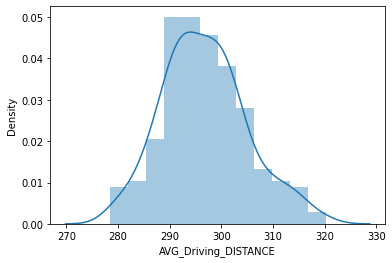

In [24]:
sns.distplot(df['AVG_Driving_DISTANCE'], kde=True)

print(f'The skewness is {round(skew.AVG_Driving_DISTANCE, 2)} and kurtosis is {round(kurt.AVG_Driving_DISTANCE,2)}.')

We see a normal distribution of the AVG_Driving_DISTANCE data

Visualize data distribution for Points

The skewness is 2.85 and kurtosis is 13.41.


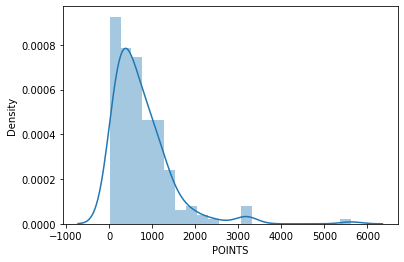

In [25]:
sns.distplot(df['POINTS'])

print(f'The skewness is {round(skew.POINTS, 2)} and kurtosis is {round(kurt.POINTS,2)}.')

There is a high positive skewness and kurtosis with the distribution of the POINTS data

Visualize data distribution for Money

The skewness is 1.95 and kurtosis is 4.81.


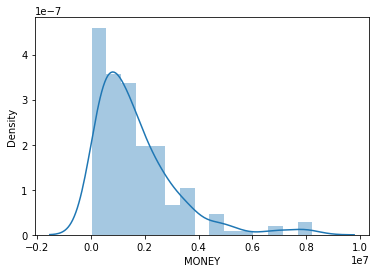

In [26]:
sns.distplot(df['MONEY'])

print(f'The skewness is {round(skew.MONEY, 2)} and kurtosis is {round(kurt.MONEY,2)}.')

There is a high positive skewness and kurtosis with the distribution of the MONEY data

Visualize data distribution for strokes gained per round

The skewness is -0.94 and kurtosis is 3.57.


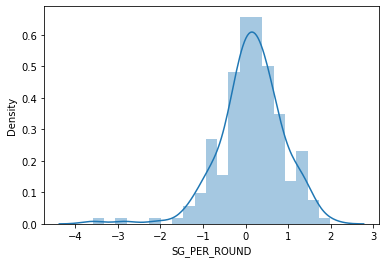

In [27]:
sns.distplot(df['SG_PER_ROUND'])

print(f'The skewness is {round(skew.SG_PER_ROUND, 2)} and kurtosis is {round(kurt.SG_PER_ROUND,2)}.')

There is a slight negative skewness and moderate kurtosis with the distribution of the SG_PER_ROUND data

Visualize data distribution for average score

The skewness is 0.78 and kurtosis is 3.15.


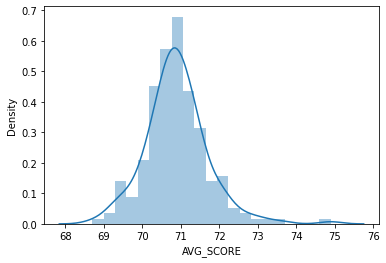

In [28]:
sns.distplot(df['AVG_SCORE'])

print(f'The skewness is {round(skew.AVG_SCORE, 2)} and kurtosis is {round(kurt.AVG_SCORE,2)}.')

We see a normal distribution of the AVG_SCORE data with slightly postivie skewness and moderate kurtosis

##Correlation Testing

Test correlations of all variables related to hypotheses

In [29]:
correlation_list = (['AVG_Driving_DISTANCE', 'NUMBER_OF_WINS', 'NUMBER_OF_TOP_Tens','AVG_SCORE','MONEY','TOTAL_SG:PUTTING','PAR_OR_BETTER','FAIRWAY_HIT_%',
       'GOING_FOR_GREEN_IN_2%', 'RTP-GOING_FOR_THE_GREEN', 'RTP-NOT_GOING_FOR_THE_GRN',
       'Three_PUTT%', 'SG_PER_ROUND', 'SG:OTT', 'SG:APR', 'SG:ARG', 'DRIVES_320+%','MAKES_BOGEY%', 'AGE'])

driving_dist_corr_df = df[correlation_list].corr()
driving_dist_corr_df

,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,AVG_SCORE,MONEY,TOTAL_SG:PUTTING,PAR_OR_BETTER,FAIRWAY_HIT_%,GOING_FOR_GREEN_IN_2%,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,Three_PUTT%,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,DRIVES_320+%,MAKES_BOGEY%,AGE
AVG_Driving_DISTANCE,1.000000,0.310112,0.390101,-0.400943,0.447671,-0.140773,-0.152336,-0.398160,0.811614,-0.544856,0.298993,0.141663,0.459917,0.630791,0.205962,0.002735,0.924110,-0.139396,-0.251643
NUMBER_OF_WINS,0.310112,1.000000,0.525058,-0.416268,0.767855,0.139272,-0.098167,-0.009044,0.211550,-0.174516,-0.083827,-0.094548,0.365996,0.314195,0.287292,0.136284,0.375273,-0.233092,-0.086034
NUMBER_OF_TOP_Tens,0.390101,0.525058,1.000000,-0.701916,0.874703,0.230889,0.153235,0.101537,0.353645,-0.473626,-0.208614,-0.250247,0.630945,0.491689,0.508742,0.305395,0.437735,-0.479028,-0.107258
AVG_SCORE,-0.400943,-0.416268,-0.701916,1.000000,-0.737144,-0.261610,-0.077790,-0.292088,-0.359249,0.462045,0.296134,0.316399,-0.880844,-0.647194,-0.709409,-0.502152,-0.389207,0.836322,-0.021587
MONEY,0.447671,0.767855,0.874703,-0.737144,1.000000,0.233047,0.013456,0.059691,0.390610,-0.391696,-0.134602,-0.218736,0.656650,0.507235,0.527168,0.330437,0.513595,-0.478106,-0.129031
TOTAL_SG:PUTTING,-0.140773,0.139272,0.230889,-0.261610,0.233047,1.000000,0.209696,-0.022288,-0.234635,0.011351,-0.262471,-0.582835,-0.110525,-0.196581,-0.141153,0.248778,-0.107755,-0.257566,-0.072688
PAR_OR_BETTER,-0.152336,-0.098167,0.153235,-0.077790,0.013456,0.209696,1.000000,0.012203,-0.150542,-0.490156,-0.286053,-0.186983,-0.010187,-0.119868,0.021241,0.154191,-0.181129,-0.162321,-0.099442
FAIRWAY_HIT_%,-0.398160,-0.009044,0.101537,-0.292088,0.059691,-0.022288,0.012203,1.000000,-0.223826,0.065038,-0.392998,-0.001424,0.323449,0.344516,0.278221,-0.049899,-0.381863,-0.432584,0.131303
GOING_FOR_GREEN_IN_2%,0.811614,0.211550,0.353645,-0.359249,0.390610,-0.234635,-0.150542,-0.223826,1.000000,-0.588978,0.462078,0.150796,0.478637,0.656684,0.235659,-0.035706,0.754444,-0.144500,-0.262759
RTP-GOING_FOR_THE_GREEN,-0.544856,-0.174516,-0.473626,0.462045,-0.391696,0.011351,-0.490156,0.065038,-0.588978,1.000000,-0.026066,0.011321,-0.512673,-0.508614,-0.370080,-0.119477,-0.471550,0.383722,0.227949


Make new dataframe for highly correlated variables to driving distance.

Highly Correlated defined as the absolute value of the correlation coefficient greater than .30.

In [30]:
poscorr = driving_dist_corr_df.AVG_Driving_DISTANCE >= .3 
negcorr = driving_dist_corr_df.AVG_Driving_DISTANCE <= -.3 
over_30_corr = poscorr + negcorr
over_30_corr_df = driving_dist_corr_df.iloc[over_30_corr.values]
over_30_corr_df.drop(['TOTAL_SG:PUTTING','PAR_OR_BETTER','RTP-NOT_GOING_FOR_THE_GRN','Three_PUTT%','SG:APR','SG:ARG','MAKES_BOGEY%','AGE'], axis = 1, inplace=True)
over_30_corr_df 


,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,AVG_SCORE,MONEY,FAIRWAY_HIT_%,GOING_FOR_GREEN_IN_2%,RTP-GOING_FOR_THE_GREEN,SG_PER_ROUND,SG:OTT,DRIVES_320+%
AVG_Driving_DISTANCE,1.000000,0.310112,0.390101,-0.400943,0.447671,-0.398160,0.811614,-0.544856,0.459917,0.630791,0.924110
NUMBER_OF_WINS,0.310112,1.000000,0.525058,-0.416268,0.767855,-0.009044,0.211550,-0.174516,0.365996,0.314195,0.375273
NUMBER_OF_TOP_Tens,0.390101,0.525058,1.000000,-0.701916,0.874703,0.101537,0.353645,-0.473626,0.630945,0.491689,0.437735
AVG_SCORE,-0.400943,-0.416268,-0.701916,1.000000,-0.737144,-0.292088,-0.359249,0.462045,-0.880844,-0.647194,-0.389207
MONEY,0.447671,0.767855,0.874703,-0.737144,1.000000,0.059691,0.390610,-0.391696,0.656650,0.507235,0.513595
FAIRWAY_HIT_%,-0.398160,-0.009044,0.101537,-0.292088,0.059691,1.000000,-0.223826,0.065038,0.323449,0.344516,-0.381863
GOING_FOR_GREEN_IN_2%,0.811614,0.211550,0.353645,-0.359249,0.390610,-0.223826,1.000000,-0.588978,0.478637,0.656684,0.754444
RTP-GOING_FOR_THE_GREEN,-0.544856,-0.174516,-0.473626,0.462045,-0.391696,0.065038,-0.588978,1.000000,-0.512673,-0.508614,-0.471550
SG_PER_ROUND,0.459917,0.365996,0.630945,-0.880844,0.656650,0.323449,0.478637,-0.512673,1.000000,0.777071,0.443762
SG:OTT,0.630791,0.314195,0.491689,-0.647194,0.507235,0.344516,0.656684,-0.508614,0.777071,1.000000,0.607716


Visualize correlation coefficients using a heat map

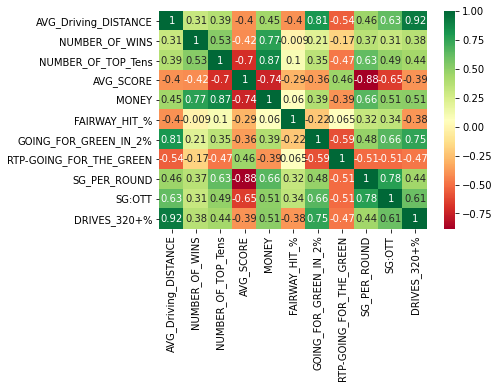

In [31]:
sns.heatmap(over_30_corr_df, annot = True, cmap = 'RdYlGn')

plt.show()

##Descriptive Statistics

Assess descriptive statistics of top 50 percent and bottom 50 percent driving distance dataframes

In [32]:
top_50_df[correlation_list].describe()

,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,AVG_SCORE,MONEY,TOTAL_SG:PUTTING,PAR_OR_BETTER,FAIRWAY_HIT_%,GOING_FOR_GREEN_IN_2%,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,Three_PUTT%,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,DRIVES_320+%,MAKES_BOGEY%,AGE
count,99.000000,99.000000,99.000000,99.000000,9.900000e+01,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,303.138384,0.333333,3.181818,70.658606,2.107215e+06,1.335343,249.373737,59.212323,61.569394,-75.808081,-4.333333,2.944545,0.376444,0.222525,0.119495,0.034374,15.717576,16.314848,31.959596
std,5.687055,0.755929,2.421686,0.812773,1.776043e+06,18.327189,46.666114,4.353998,6.977788,21.496405,8.395820,0.633107,0.734549,0.362417,0.414351,0.217316,6.556503,1.897887,5.706994
min,296.200000,0.000000,0.000000,68.702000,8.910400e+04,-40.194000,156.000000,40.850000,45.270000,-128.000000,-23.000000,1.670000,-3.586000,-1.585000,-1.504000,-0.497000,6.760000,12.460000,22.000000
25%,299.000000,0.000000,1.000000,70.224000,7.952340e+05,-8.627000,213.500000,56.340000,56.740000,-88.000000,-9.000000,2.480000,-0.046500,0.027000,-0.120500,-0.124000,10.875000,15.220000,28.000000
50%,301.600000,0.000000,3.000000,70.734000,1.595942e+06,0.810000,245.000000,59.020000,60.630000,-72.000000,-4.000000,2.870000,0.373000,0.229000,0.159000,0.027000,13.890000,16.180000,32.000000
75%,305.900000,0.000000,4.500000,71.048500,2.761220e+06,11.107000,282.000000,62.635000,66.870000,-63.500000,0.000000,3.295000,0.815000,0.412000,0.389500,0.200500,18.950000,17.220000,35.000000
max,320.200000,3.000000,11.000000,74.891000,8.225921e+06,60.061000,356.000000,71.450000,78.440000,-22.000000,27.000000,4.630000,1.987000,1.006000,0.990000,0.629000,33.920000,28.250000,49.000000


In [33]:
bottom_50_df[correlation_list].describe()

,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,AVG_SCORE,MONEY,TOTAL_SG:PUTTING,PAR_OR_BETTER,FAIRWAY_HIT_%,GOING_FOR_GREEN_IN_2%,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,Three_PUTT%,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,DRIVES_320+%,MAKES_BOGEY%,AGE
count,98.000000,98.000000,98.000000,98.000000,9.800000e+01,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,290.298980,0.142857,2.122449,71.131173,1.204137e+06,4.740327,263.102041,62.960714,50.782959,-59.255102,-9.275510,2.792857,-0.101908,-0.139622,0.008949,0.028704,5.860612,16.670510,33.959184
std,4.222143,0.351726,1.812132,0.755630,9.446331e+05,18.167656,58.600603,5.175028,7.678987,18.920513,10.615861,0.640897,0.689527,0.393084,0.368360,0.223597,2.293511,2.267864,5.663991
min,278.400000,0.000000,0.000000,69.311000,2.487800e+04,-42.673000,136.000000,47.150000,28.360000,-102.000000,-51.000000,1.480000,-2.840000,-1.443000,-1.586000,-0.924000,1.240000,12.200000,21.000000
25%,287.950000,0.000000,1.000000,70.602750,4.411060e+05,-6.083250,216.000000,60.142500,45.842500,-71.000000,-14.750000,2.382500,-0.486000,-0.305000,-0.166750,-0.119000,4.075000,15.232500,30.000000
50%,291.050000,0.000000,2.000000,71.031000,9.386740e+05,5.564000,276.000000,63.415000,51.620000,-58.500000,-9.000000,2.800000,-0.020000,-0.064500,0.021500,0.019500,5.765000,16.480000,34.000000
75%,293.350000,0.000000,3.000000,71.518250,1.815034e+06,15.160000,303.750000,66.280000,56.382500,-47.000000,-2.000000,3.157500,0.301250,0.111750,0.266250,0.193000,7.450000,17.672500,37.000000
max,296.200000,1.000000,8.000000,73.624000,4.691667e+06,46.404000,392.000000,74.330000,71.540000,-22.000000,12.000000,5.090000,1.479000,0.587000,0.975000,0.632000,12.140000,24.320000,49.000000


Create dictionary for difference between means of top and bottom 50 % in driving distance 

In [34]:
top_bottom_50_mean_diff = {}
for x in df[correlation_list]:
  diff = round((top_50_df[x].mean() - bottom_50_df[x].mean()),2)
  top_bottom_50_mean_diff[x] = diff

In [35]:
top_bottom_50_mean_diff

{'AGE': -2.0,
 'AVG_Driving_DISTANCE': 12.84,
 'AVG_SCORE': -0.47,
 'DRIVES_320+%': 9.86,
 'FAIRWAY_HIT_%': -3.75,
 'GOING_FOR_GREEN_IN_2%': 10.79,
 'MAKES_BOGEY%': -0.36,
 'MONEY': 903078.84,
 'NUMBER_OF_TOP_Tens': 1.06,
 'NUMBER_OF_WINS': 0.19,
 'PAR_OR_BETTER': -13.73,
 'RTP-GOING_FOR_THE_GREEN': -16.55,
 'RTP-NOT_GOING_FOR_THE_GRN': 4.94,
 'SG:APR': 0.11,
 'SG:ARG': 0.01,
 'SG:OTT': 0.36,
 'SG_PER_ROUND': 0.48,
 'TOTAL_SG:PUTTING': -3.4,
 'Three_PUTT%': 0.15}

Assess descriptive statistics of over and under 300 yards driving 
distance dataframes

In [36]:
over_300_df[correlation_list].describe()

,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,AVG_SCORE,MONEY,TOTAL_SG:PUTTING,PAR_OR_BETTER,FAIRWAY_HIT_%,GOING_FOR_GREEN_IN_2%,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,Three_PUTT%,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,DRIVES_320+%,MAKES_BOGEY%,AGE
count,62.000000,62.000000,62.000000,62.00000,6.200000e+01,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,306.083871,0.435484,3.564516,70.52900,2.373406e+06,0.955419,250.048387,58.849355,64.135000,-81.951613,-3.903226,2.973226,0.517323,0.334113,0.136629,0.046548,18.495968,16.182097,31.258065
std,5.240172,0.880033,2.551894,0.77230,2.008144e+06,19.276550,49.008005,3.480960,6.585874,21.619987,8.756655,0.649859,0.689911,0.312502,0.425042,0.212524,6.653999,1.617921,5.216416
min,300.000000,0.000000,0.000000,68.70200,8.910400e+04,-40.194000,156.000000,51.930000,50.570000,-128.000000,-23.000000,1.670000,-1.020000,-0.448000,-1.039000,-0.307000,8.720000,12.460000,22.000000
25%,302.425000,0.000000,2.000000,70.11425,1.000609e+06,-10.673750,213.250000,56.340000,58.642500,-97.000000,-9.000000,2.492500,0.005750,0.172250,-0.109250,-0.121250,13.100000,15.037500,27.250000
50%,303.800000,0.000000,3.000000,70.71100,1.611929e+06,0.779000,244.500000,58.930000,64.430000,-77.500000,-4.000000,2.935000,0.490000,0.318000,0.154500,0.000500,16.670000,16.255000,31.000000
75%,309.475000,0.000000,5.000000,70.95825,3.373650e+06,10.946750,288.500000,61.195000,68.725000,-66.000000,1.000000,3.315000,1.165250,0.551250,0.408250,0.204500,23.025000,17.420000,34.000000
max,320.200000,3.000000,11.000000,72.25100,8.225921e+06,60.061000,352.000000,68.160000,78.440000,-25.000000,27.000000,4.630000,1.987000,1.006000,0.990000,0.629000,33.920000,20.370000,47.000000


In [37]:
under_300_df[correlation_list].describe()

,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,AVG_SCORE,MONEY,TOTAL_SG:PUTTING,PAR_OR_BETTER,FAIRWAY_HIT_%,GOING_FOR_GREEN_IN_2%,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN,Three_PUTT%,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,DRIVES_320+%,MAKES_BOGEY%,AGE
count,133.000000,133.000000,133.000000,133.000000,1.330000e+02,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,292.409023,0.150376,2.225564,71.063226,1.317472e+06,4.116842,259.676692,62.081504,52.537368,-61.127820,-8.120301,2.817368,-0.041398,-0.093722,0.026887,0.025376,7.237594,16.624586,33.646617
std,5.100512,0.379318,1.881394,0.789127,1.019856e+06,17.842306,55.173082,5.382783,7.719995,18.492592,10.127249,0.635812,0.715326,0.391513,0.378494,0.225160,3.306683,2.275561,5.728974
min,278.400000,0.000000,0.000000,69.311000,2.487800e+04,-42.673000,136.000000,40.850000,28.360000,-102.000000,-51.000000,1.480000,-3.586000,-1.585000,-1.586000,-0.924000,1.240000,12.200000,21.000000
25%,289.400000,0.000000,1.000000,70.568000,4.981660e+05,-6.534000,216.000000,58.760000,48.060000,-73.000000,-14.000000,2.390000,-0.363000,-0.271000,-0.155000,-0.126000,4.760000,15.250000,30.000000
50%,292.600000,0.000000,2.000000,70.993000,1.076678e+06,4.449000,262.000000,62.990000,53.120000,-62.000000,-8.000000,2.820000,0.077000,-0.028000,0.036000,0.023000,6.760000,16.280000,34.000000
75%,296.300000,0.000000,3.000000,71.367000,1.883510e+06,15.055000,297.000000,65.330000,57.930000,-49.000000,-1.000000,3.150000,0.431000,0.149000,0.278000,0.187000,9.140000,17.410000,36.000000
max,299.900000,2.000000,8.000000,74.891000,4.749587e+06,48.801000,392.000000,74.330000,71.540000,-22.000000,12.000000,5.090000,1.479000,0.587000,0.975000,0.632000,15.830000,28.250000,49.000000


Create dictionary for difference between means of over and under 300 yard average driving distance 

In [38]:
over_under_300_mean_diff = {}
for x in df[correlation_list]:
  diff = round((over_300_df[x].mean() - under_300_df[x].mean()),2)
  over_under_300_mean_diff[x] = diff

In [39]:
over_under_300_mean_diff

{'AGE': -2.39,
 'AVG_Driving_DISTANCE': 13.67,
 'AVG_SCORE': -0.53,
 'DRIVES_320+%': 11.26,
 'FAIRWAY_HIT_%': -3.23,
 'GOING_FOR_GREEN_IN_2%': 11.6,
 'MAKES_BOGEY%': -0.44,
 'MONEY': 1055933.91,
 'NUMBER_OF_TOP_Tens': 1.34,
 'NUMBER_OF_WINS': 0.29,
 'PAR_OR_BETTER': -9.63,
 'RTP-GOING_FOR_THE_GREEN': -20.82,
 'RTP-NOT_GOING_FOR_THE_GRN': 4.22,
 'SG:APR': 0.11,
 'SG:ARG': 0.02,
 'SG:OTT': 0.43,
 'SG_PER_ROUND': 0.56,
 'TOTAL_SG:PUTTING': -3.16,
 'Three_PUTT%': 0.16}

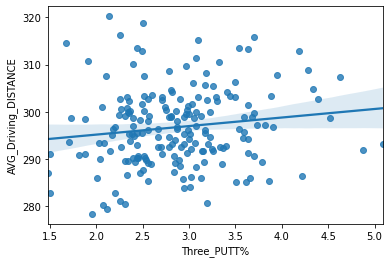

In [40]:
sns.regplot(x = 'Three_PUTT%', y='AVG_Driving_DISTANCE', data = df)

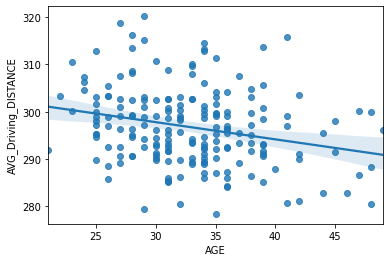

In [41]:
sns.regplot(x = 'AGE', y='AVG_Driving_DISTANCE', data = df)     

##Hypothesis 1 Analysis

**H1 = Players with higher average driving distance will have more success on PGA including more wins, top 10s, and money earned.**


---



Create list of variables for H1 analysis

In [42]:
h1_list = (['AVG_Driving_DISTANCE', 'NUMBER_OF_WINS', 'NUMBER_OF_TOP_Tens', 'MONEY'])

**Descriptive Statistics for H1 in Top 50%, Bottom 50%, and Over 300 yard driving distance groupings:**

In [43]:
top_50_df[h1_list].describe()

,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,MONEY
count,99.000000,99.000000,99.000000,9.900000e+01
mean,303.138384,0.333333,3.181818,2.107215e+06
std,5.687055,0.755929,2.421686,1.776043e+06
min,296.200000,0.000000,0.000000,8.910400e+04
25%,299.000000,0.000000,1.000000,7.952340e+05
50%,301.600000,0.000000,3.000000,1.595942e+06
75%,305.900000,0.000000,4.500000,2.761220e+06
max,320.200000,3.000000,11.000000,8.225921e+06


In [44]:
bottom_50_df[h1_list].describe()

,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,MONEY
count,98.000000,98.000000,98.000000,9.800000e+01
mean,290.298980,0.142857,2.122449,1.204137e+06
std,4.222143,0.351726,1.812132,9.446331e+05
min,278.400000,0.000000,0.000000,2.487800e+04
25%,287.950000,0.000000,1.000000,4.411060e+05
50%,291.050000,0.000000,2.000000,9.386740e+05
75%,293.350000,0.000000,3.000000,1.815034e+06
max,296.200000,1.000000,8.000000,4.691667e+06


In [45]:
over_300_df[h1_list].describe()

,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,MONEY
count,62.000000,62.000000,62.000000,6.200000e+01
mean,306.083871,0.435484,3.564516,2.373406e+06
std,5.240172,0.880033,2.551894,2.008144e+06
min,300.000000,0.000000,0.000000,8.910400e+04
25%,302.425000,0.000000,2.000000,1.000609e+06
50%,303.800000,0.000000,3.000000,1.611929e+06
75%,309.475000,0.000000,5.000000,3.373650e+06
max,320.200000,3.000000,11.000000,8.225921e+06


**Correlations:**

In [46]:
h1_list_corr_df = df[h1_list].corr()
h1_list_corr_df

,AVG_Driving_DISTANCE,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,MONEY
AVG_Driving_DISTANCE,1.000000,0.310112,0.390101,0.447671
NUMBER_OF_WINS,0.310112,1.000000,0.525058,0.767855
NUMBER_OF_TOP_Tens,0.390101,0.525058,1.000000,0.874703
MONEY,0.447671,0.767855,0.874703,1.000000


**Visualizations:**

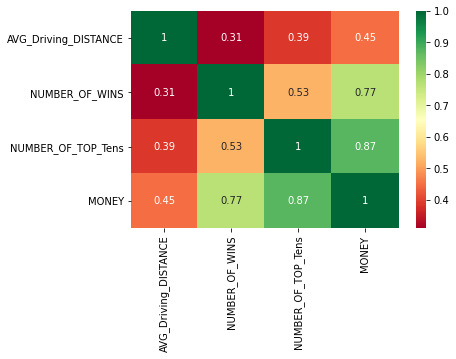

In [47]:
sns.heatmap(h1_list_corr_df, annot = True, cmap = 'RdYlGn')
plt.show()

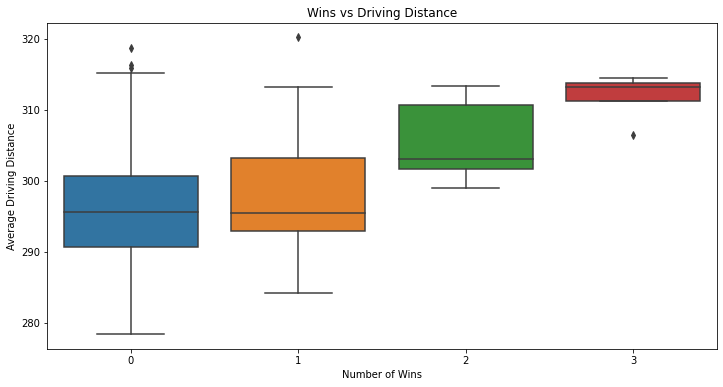

In [48]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'NUMBER_OF_WINS', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Number of Wins')
plt.ylabel('Average Driving Distance')
plt.title('Wins vs Driving Distance')
plt.show()

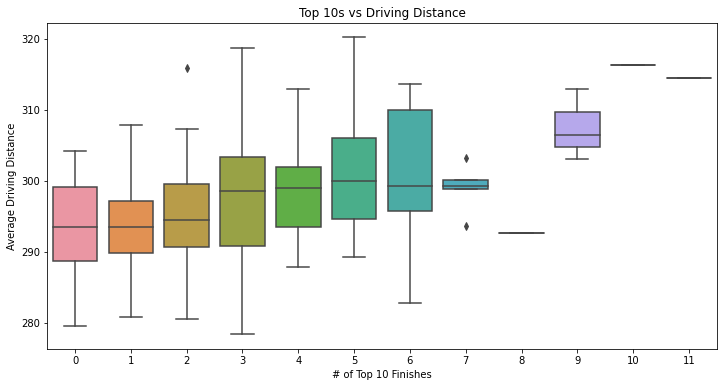

In [49]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'NUMBER_OF_TOP_Tens', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('# of Top 10 Finishes')
plt.ylabel('Average Driving Distance')
plt.title('Top 10s vs Driving Distance')
plt.show()

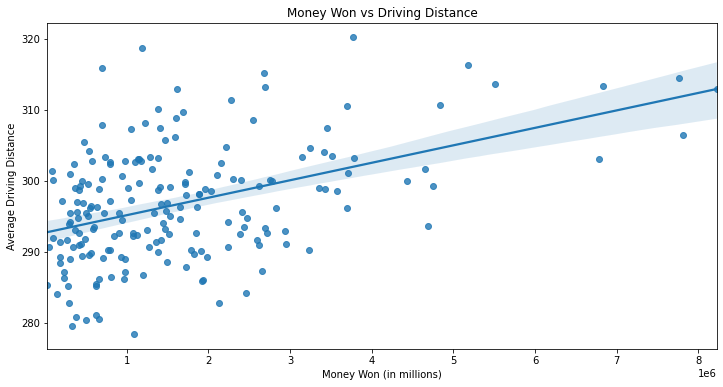

In [50]:
plt.figure(figsize = (12,6))
sns.regplot(x = 'MONEY', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Money Won (in millions)')
plt.ylabel('Average Driving Distance')
plt.title('Money Won vs Driving Distance')
plt.show()

**T-Test Analysis:**

Run t-tests for statistical significance between top and bottom 50% players

In [51]:
for x in h1_list:
  print(f'The t-test results for {x} column comparing the top and bottom 50% in average driving distance are:')
  print(stats.ttest_ind(top_50_df[x], bottom_50_df[x]))
  print('\n')

The t-test results for AVG_Driving_DISTANCE column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=17.977004473009526, pvalue=2.9831462094179926e-43)


The t-test results for NUMBER_OF_WINS column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=2.263607206946361, pvalue=0.024699518256500137)


The t-test results for NUMBER_OF_TOP_Tens column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=3.4735514944529537, pvalue=0.0006327165997008301)


The t-test results for MONEY column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=4.449060442456906, pvalue=1.4480132101464633e-05)




Run t-tests for statistical significance between over and under 300 yards average driving distance

In [52]:
for y in h1_list:
  print(f'The t-test results for {y} column comparing the over and under average driving distance of 300 yards are:')
  print(stats.ttest_ind(over_300_df[y], under_300_df[y]))
  print('\n')

The t-test results for AVG_Driving_DISTANCE column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=17.283678491926892, pvalue=4.681984277618193e-41)


The t-test results for NUMBER_OF_WINS column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=3.164830495977456, pvalue=0.0018032590013044387)


The t-test results for NUMBER_OF_TOP_Tens column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=4.11407182735084, pvalue=5.752419264872462e-05)


The t-test results for MONEY column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=4.872578015825289, pvalue=2.2911126223226177e-06)




**Results of H1 Testing:**


*   Higher mean wins, top 10s and money won in top 50% driving distance grouping compared to bottom 50% driving distance grouping.
*   High positive correlation across all 3 variables with increased driving distance.
---
*   Accept the null hypothesis with a p-value of 0.024, 0.0006, and 1.448e-05 in wins, top 10s, and money won in the top 50% and bottom 50% groupings. respectively.
*   Higher statistical significnce seen between over 300 yard driving distance and under 300 year driving distance groupings across win, top 10s, and money won variables.






##Hypothesis 2 Analysis

**H2 = Players with higher average driving distance will have better strokes gained statistics**

---



Create list of variables for H2 analysis

In [53]:
h2_list = (['AVG_Driving_DISTANCE','SG_PER_ROUND', 'SG:OTT', 'SG:APR', 'SG:ARG', 'TOTAL_SG:PUTTING'])

**Descriptive Statistics for H2 in Top 50%, Bottom 50%, and Over 300 yard driving distance groupings:**

In [54]:
top_50_df[h2_list].describe()

,AVG_Driving_DISTANCE,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,TOTAL_SG:PUTTING
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,303.138384,0.376444,0.222525,0.119495,0.034374,1.335343
std,5.687055,0.734549,0.362417,0.414351,0.217316,18.327189
min,296.200000,-3.586000,-1.585000,-1.504000,-0.497000,-40.194000
25%,299.000000,-0.046500,0.027000,-0.120500,-0.124000,-8.627000
50%,301.600000,0.373000,0.229000,0.159000,0.027000,0.810000
75%,305.900000,0.815000,0.412000,0.389500,0.200500,11.107000
max,320.200000,1.987000,1.006000,0.990000,0.629000,60.061000


In [55]:
bottom_50_df[h2_list].describe()

,AVG_Driving_DISTANCE,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,TOTAL_SG:PUTTING
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,290.298980,-0.101908,-0.139622,0.008949,0.028704,4.740327
std,4.222143,0.689527,0.393084,0.368360,0.223597,18.167656
min,278.400000,-2.840000,-1.443000,-1.586000,-0.924000,-42.673000
25%,287.950000,-0.486000,-0.305000,-0.166750,-0.119000,-6.083250
50%,291.050000,-0.020000,-0.064500,0.021500,0.019500,5.564000
75%,293.350000,0.301250,0.111750,0.266250,0.193000,15.160000
max,296.200000,1.479000,0.587000,0.975000,0.632000,46.404000


In [56]:
over_300_df[h2_list].describe()

,AVG_Driving_DISTANCE,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,TOTAL_SG:PUTTING
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,306.083871,0.517323,0.334113,0.136629,0.046548,0.955419
std,5.240172,0.689911,0.312502,0.425042,0.212524,19.276550
min,300.000000,-1.020000,-0.448000,-1.039000,-0.307000,-40.194000
25%,302.425000,0.005750,0.172250,-0.109250,-0.121250,-10.673750
50%,303.800000,0.490000,0.318000,0.154500,0.000500,0.779000
75%,309.475000,1.165250,0.551250,0.408250,0.204500,10.946750
max,320.200000,1.987000,1.006000,0.990000,0.629000,60.061000


**Correlations:**

In [57]:
h2_list_corr_df = df[h2_list].corr()
h2_list_corr_df

,AVG_Driving_DISTANCE,SG_PER_ROUND,SG:OTT,SG:APR,SG:ARG,TOTAL_SG:PUTTING
AVG_Driving_DISTANCE,1.000000,0.459917,0.630791,0.205962,0.002735,-0.140773
SG_PER_ROUND,0.459917,1.000000,0.777071,0.839260,0.429187,-0.110525
SG:OTT,0.630791,0.777071,1.000000,0.423156,-0.005909,-0.196581
SG:APR,0.205962,0.839260,0.423156,1.000000,0.263644,-0.141153
SG:ARG,0.002735,0.429187,-0.005909,0.263644,1.000000,0.248778
TOTAL_SG:PUTTING,-0.140773,-0.110525,-0.196581,-0.141153,0.248778,1.000000


**Visualizations:**

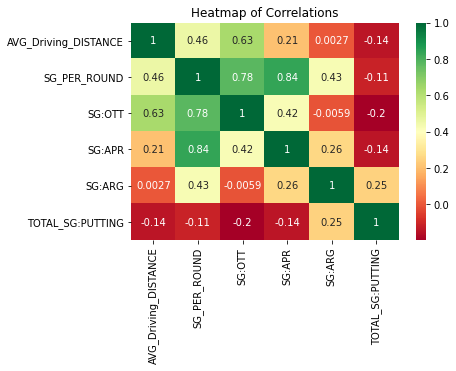

In [58]:
sns.heatmap(h2_list_corr_df, annot = True, cmap = 'RdYlGn')
plt.title('Heatmap of Correlations')
plt.show()

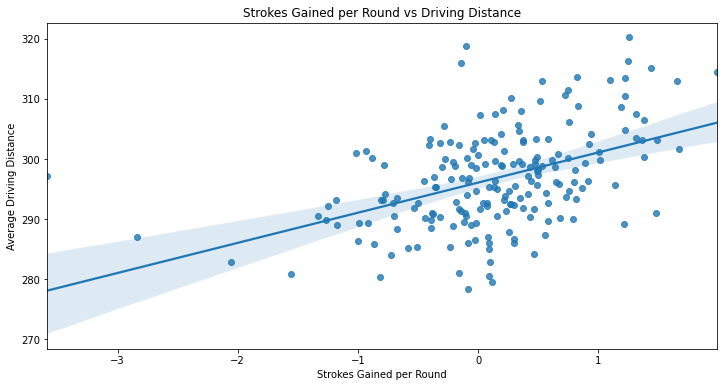

In [59]:
plt.figure(figsize=(12,6))
sns.regplot(x = 'SG_PER_ROUND', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Strokes Gained per Round')
plt.ylabel('Average Driving Distance')
plt.title('Strokes Gained per Round vs Driving Distance')
plt.show()

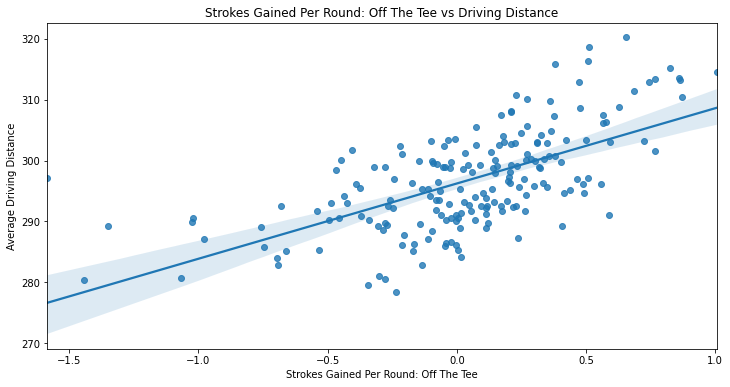

In [60]:
plt.figure(figsize=(12,6))
sns.regplot(x = 'SG:OTT', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Strokes Gained Per Round: Off The Tee')
plt.ylabel('Average Driving Distance')
plt.title('Strokes Gained Per Round: Off The Tee vs Driving Distance')
plt.show()

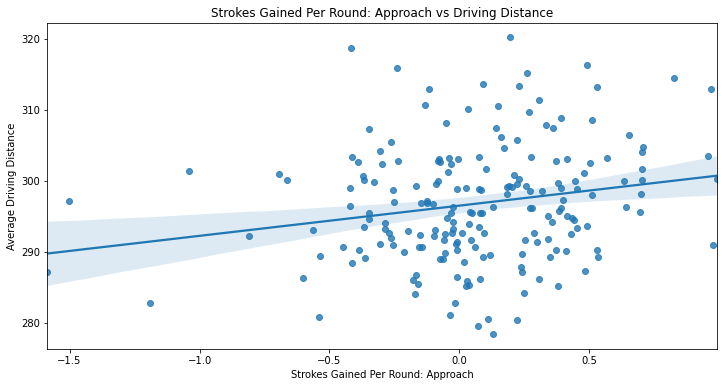

In [61]:
plt.figure(figsize=(12,6))
sns.regplot(x = 'SG:APR', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Strokes Gained Per Round: Approach')
plt.ylabel('Average Driving Distance')
plt.title('Strokes Gained Per Round: Approach vs Driving Distance')
plt.show()

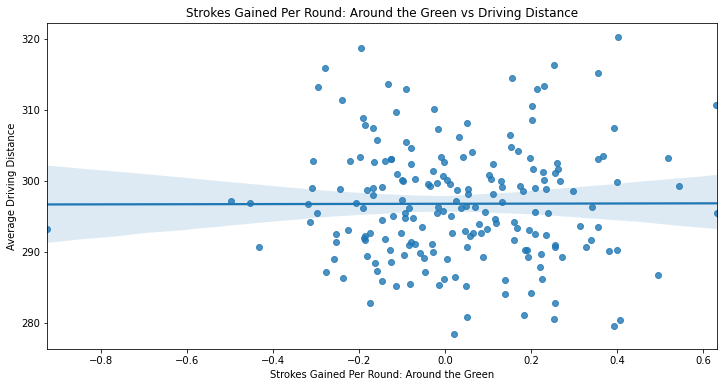

In [62]:
plt.figure(figsize=(12,6))
sns.regplot(x = 'SG:ARG', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Strokes Gained Per Round: Around the Green')
plt.ylabel('Average Driving Distance')
plt.title('Strokes Gained Per Round: Around the Green vs Driving Distance')
plt.show()

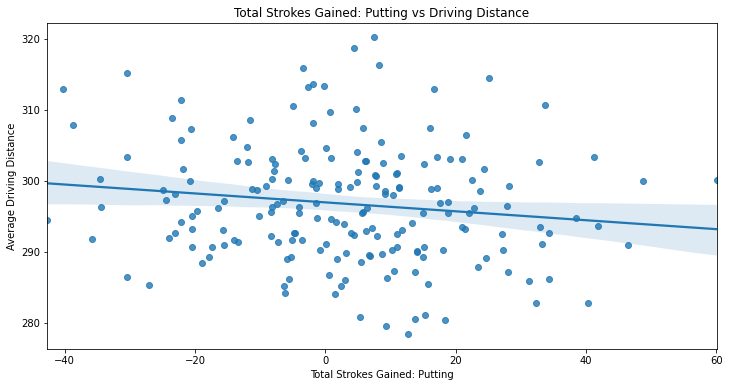

In [63]:
plt.figure(figsize=(12,6))
sns.regplot(x = 'TOTAL_SG:PUTTING', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Total Strokes Gained: Putting')
plt.ylabel('Average Driving Distance')
plt.title('Total Strokes Gained: Putting vs Driving Distance')
plt.show()

**T-Test Analysis:**

Run t-tests for statistical significance between top and bottom 50% players

In [64]:
for x in h2_list:
  print(f'The t-test results for {x} column comparing the top and bottom 50% in average driving distance are:')
  print(stats.ttest_ind(top_50_df[x], bottom_50_df[x]))
  print('\n')

The t-test results for AVG_Driving_DISTANCE column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=17.977004473009526, pvalue=2.9831462094179926e-43)


The t-test results for SG_PER_ROUND column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=4.711458528569094, pvalue=4.666726706320066e-06)


The t-test results for SG:OTT column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=6.723739272937005, pvalue=1.9097909964039726e-10)


The t-test results for SG:APR column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=1.9782929293867122, pvalue=0.04930375538317859)


The t-test results for SG:ARG column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=0.18047586471968233, pvalue=0.8569664244349027)


The t-test results for TOTAL_SG:PUTTING column comparing the top and bottom 50%

Run t-tests for statistical significance between over and under 300 yards average driving distance

In [65]:
for y in h2_list:
  print(f'The t-test results for {y} column comparing the over and under average driving distance of 300 yards are:')
  print(stats.ttest_ind(over_300_df[y], under_300_df[y]))
  print('\n')

The t-test results for AVG_Driving_DISTANCE column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=17.283678491926892, pvalue=4.681984277618193e-41)


The t-test results for SG_PER_ROUND column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=5.136166108405067, pvalue=6.827833962369511e-07)


The t-test results for SG:OTT column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=7.5524519484132435, pvalue=1.6623456136910585e-12)


The t-test results for SG:APR column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=1.8121738656511948, pvalue=0.07151351629223547)


The t-test results for SG:ARG column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=0.622305786166279, pvalue=0.5344753280212086)


The t-test results for TOTAL_SG:PUTTING column comp

**Results of H2 Testing:**




*   Higher strokes gained per round mean in top 50% vs bottom 50% driving distance groupings by .477 strokes.
*   Leads to 1.908 strokes per 4 round tournament
*   Positive correlation across all strokes gained except strokes gained putting.
*   Closer shots occur to the hole, the lower the correlation of strokes gained to driving distance
---
*   Accept the null hypothesis with a p-value of 4.66e-06 in strokes gained per round in the top 50% and bottom 50% groupings.
*   Also had a p-value of 6.82e-07 in strokes gained per round between over 300 yard and under 300 yard driving averages groupings.


---


*   Even though strokes gained per round were statistically significant between groupings, SG:Around the Green and Putting were not statistically significant.
*   Still accept the null hypothesis due to total strokes gained were statistically significant but statistically, increased driving distance doesnt lead to better strokes gained in all aspects of golf. 




##Hypothesis 3 Analysis

**H3 = Players with higher average driving distance will have lower scoring averages**

---



Create list of variables for H3 analysis

In [66]:
h3_list = (['AVG_Driving_DISTANCE', 'AVG_SCORE','PAR_OR_BETTER'])

**Descriptive Statistics for H3 in Top 50%, Bottom 50%, and Over 300 yard driving distance groupings:**


In [67]:
top_50_df[h3_list].describe()

,AVG_Driving_DISTANCE,AVG_SCORE,PAR_OR_BETTER
count,99.000000,99.000000,99.000000
mean,303.138384,70.658606,249.373737
std,5.687055,0.812773,46.666114
min,296.200000,68.702000,156.000000
25%,299.000000,70.224000,213.500000
50%,301.600000,70.734000,245.000000
75%,305.900000,71.048500,282.000000
max,320.200000,74.891000,356.000000


In [68]:
bottom_50_df[h3_list].describe()

,AVG_Driving_DISTANCE,AVG_SCORE,PAR_OR_BETTER
count,98.000000,98.000000,98.000000
mean,290.298980,71.131173,263.102041
std,4.222143,0.755630,58.600603
min,278.400000,69.311000,136.000000
25%,287.950000,70.602750,216.000000
50%,291.050000,71.031000,276.000000
75%,293.350000,71.518250,303.750000
max,296.200000,73.624000,392.000000


In [69]:
over_300_df[h3_list].describe()

,AVG_Driving_DISTANCE,AVG_SCORE,PAR_OR_BETTER
count,62.000000,62.00000,62.000000
mean,306.083871,70.52900,250.048387
std,5.240172,0.77230,49.008005
min,300.000000,68.70200,156.000000
25%,302.425000,70.11425,213.250000
50%,303.800000,70.71100,244.500000
75%,309.475000,70.95825,288.500000
max,320.200000,72.25100,352.000000


**Correlations:**

In [70]:
h3_list_corr_df = df[h3_list].corr()
h3_list_corr_df

,AVG_Driving_DISTANCE,AVG_SCORE,PAR_OR_BETTER
AVG_Driving_DISTANCE,1.000000,-0.400943,-0.152336
AVG_SCORE,-0.400943,1.000000,-0.077790
PAR_OR_BETTER,-0.152336,-0.077790,1.000000


**Visualizations:**

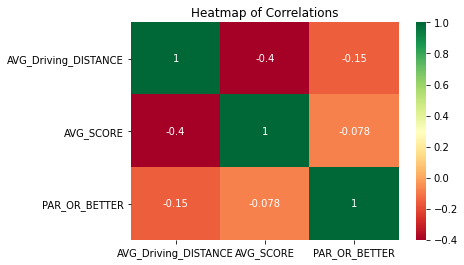

In [71]:
sns.heatmap(h3_list_corr_df, annot = True, cmap = 'RdYlGn')
plt.title('Heatmap of Correlations')
plt.show()

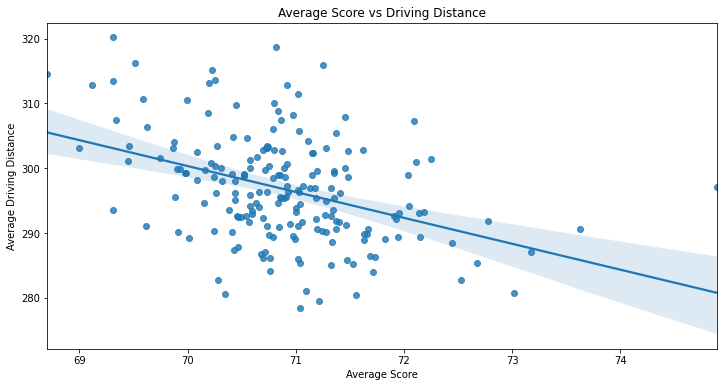

In [72]:
plt.figure(figsize=(12,6))
sns.regplot(x = 'AVG_SCORE', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Average Score')
plt.ylabel('Average Driving Distance')
plt.title('Average Score vs Driving Distance')
plt.show()

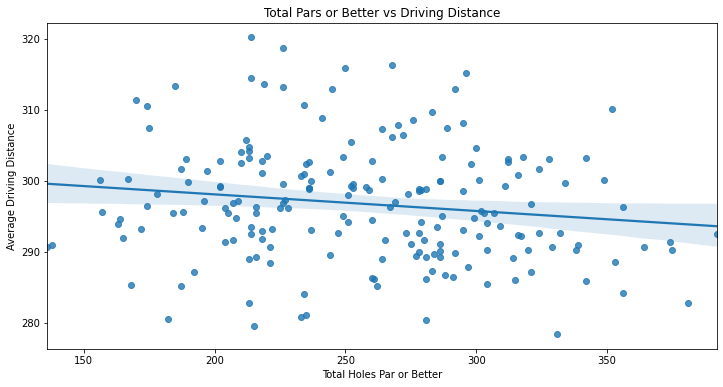

In [73]:
plt.figure(figsize=(12,6))
sns.regplot(x = 'PAR_OR_BETTER', y='AVG_Driving_DISTANCE', data = df)
plt.xlabel('Total Holes Par or Better')
plt.ylabel('Average Driving Distance')
plt.title('Total Pars or Better vs Driving Distance')
plt.show()

**T-test Analysis:**

Run t-tests for statistical significance between top and bottom 50% players

In [74]:
for x in h3_list:
  print(f'The t-test results for {x} column comparing the top and bottom 50% in average driving distance are:')
  print(stats.ttest_ind(top_50_df[x], bottom_50_df[x]))
  print('\n')

The t-test results for AVG_Driving_DISTANCE column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=17.977004473009526, pvalue=2.9831462094179926e-43)


The t-test results for AVG_SCORE column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=-4.225368653932252, pvalue=3.6606668081070745e-05)


The t-test results for PAR_OR_BETTER column comparing the top and bottom 50% in average driving distance are:
Ttest_indResult(statistic=-1.8198240595544244, pvalue=0.07031918864409493)




Run t-tests for statistical significance between over and under 300 yards average driving distance

In [75]:
for y in h3_list:
  print(f'The t-test results for {y} column comparing the over and under average driving distance of 300 yards are:')
  print(stats.ttest_ind(over_300_df[y], under_300_df[y]))
  print('\n')

The t-test results for AVG_Driving_DISTANCE column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=17.283678491926892, pvalue=4.681984277618193e-41)


The t-test results for AVG_SCORE column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=-4.431973933828141, pvalue=1.5640004669604865e-05)


The t-test results for PAR_OR_BETTER column comparing the over and under average driving distance of 300 yards are:
Ttest_indResult(statistic=-1.1746633958676564, pvalue=0.24157668212690542)




**Results of H3 Testing:**



*   Lower mean average score in top 50% group vs bottom 50% group.
*   Even slightly lower mean score in over 300 year group compared to top 50% group.
*   Negative correlation seen between avgerage score and driving distance. Meaning the longer the driving distance, the lower the score.
*   Accept the null hypothesis with a p-value of 3.66e-05 between average acore in the top 50% and bottom 50% groupings.
*   Also had a p-value of 1.56e-05 between average score over 300 yard and under 300 yard driving averages groupings.
---
*   Interesting to see a negative correlation with driving distance and Total Pars or better, especially with a lower average score in longer driving distances
*   This likely means that players with increased driving distance score more birdies and eagles, but also more bogeys or worse

##Recommendations from Hypotheses


*   Based on data analysis, it appears that increased driving distance leads to improved stats across most major statistical categories including:
1.   Wins
2.   Top 10s
3.   Money Won
4.   Strokes Gained per Round
5.   Average Score

*   From this analysis, I would recommend any golfer who wants to shoot lower scores to work to increase their driving distance. This would include both the professional and amateur golfer.

*   This analysis also validates the work of many fitness professionals who work with golfers to increase their strength, flexibility, and power to increased their distance.  

*   This analysis was only completed from statistics from one season and would be beneifical to include data from more seasons to verify this information.



##Other Trends Related to Driving Distance

Create list of variables to analyze

In [76]:
h4_list = (['AVG_Driving_DISTANCE', 'AGE','FAIRWAY_HIT_%','Three_PUTT%','GOING_FOR_GREEN_IN_2%','RTP-GOING_FOR_THE_GREEN','RTP-NOT_GOING_FOR_THE_GRN'])

**Correlation Testing:**

In [77]:
h4_list_corr_df = df[h4_list].corr()
h4_list_corr_df

,AVG_Driving_DISTANCE,AGE,FAIRWAY_HIT_%,Three_PUTT%,GOING_FOR_GREEN_IN_2%,RTP-GOING_FOR_THE_GREEN,RTP-NOT_GOING_FOR_THE_GRN
AVG_Driving_DISTANCE,1.000000,-0.251643,-0.398160,0.141663,0.811614,-0.544856,0.298993
AGE,-0.251643,1.000000,0.131303,-0.137907,-0.262759,0.227949,-0.167852
FAIRWAY_HIT_%,-0.398160,0.131303,1.000000,-0.001424,-0.223826,0.065038,-0.392998
Three_PUTT%,0.141663,-0.137907,-0.001424,1.000000,0.150796,0.011321,0.247174
GOING_FOR_GREEN_IN_2%,0.811614,-0.262759,-0.223826,0.150796,1.000000,-0.588978,0.462078
RTP-GOING_FOR_THE_GREEN,-0.544856,0.227949,0.065038,0.011321,-0.588978,1.000000,-0.026066
RTP-NOT_GOING_FOR_THE_GRN,0.298993,-0.167852,-0.392998,0.247174,0.462078,-0.026066,1.000000


**Heatmap of Correlations:**

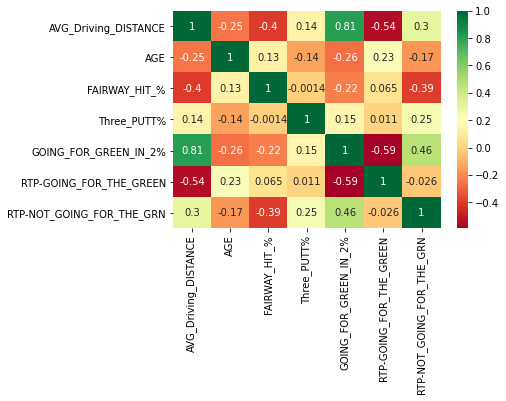

In [78]:
sns.heatmap(h4_list_corr_df, annot = True, cmap = 'RdYlGn')
plt.show()

**Visualizations:**

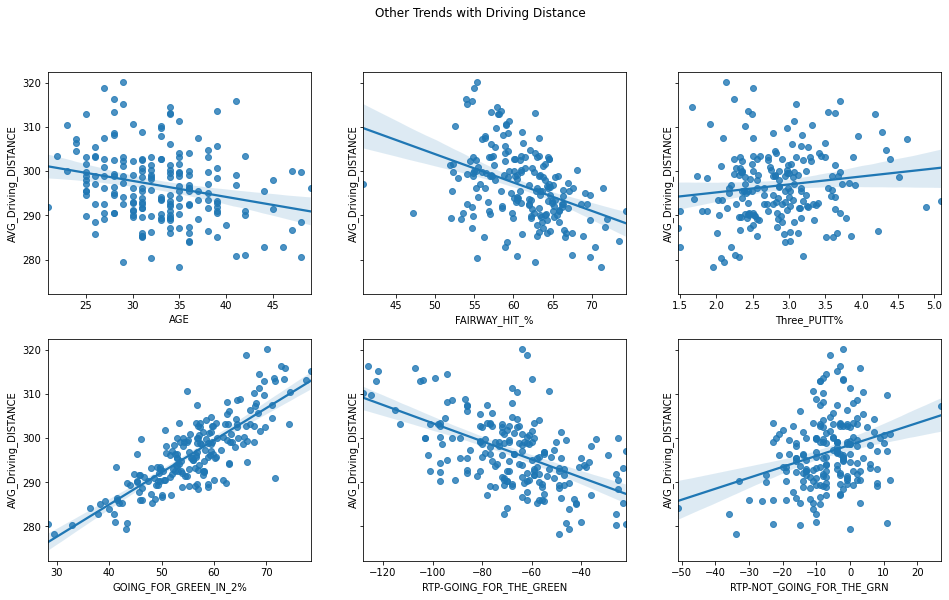

In [79]:
fig, axes = plt.subplots(2, 3, figsize=(16, 9), sharey=True)
fig.suptitle('Other Trends with Driving Distance')

#Age
sns.regplot(ax=axes[0,0], data = df, x = 'AGE', y='AVG_Driving_DISTANCE')

#FAIRWAY_HIT_%
sns.regplot(ax=axes[0,1], data = df, x = 'FAIRWAY_HIT_%', y='AVG_Driving_DISTANCE')

#Three_PUTT%
sns.regplot(ax=axes[0,2], data = df, x = 'Three_PUTT%', y='AVG_Driving_DISTANCE')

#GOING_FOR_GREEN_IN_2%
sns.regplot(ax=axes[1,0], data = df, x = 'GOING_FOR_GREEN_IN_2%', y='AVG_Driving_DISTANCE')

#RTP-GOING_FOR_THE_GREEN
sns.regplot(ax=axes[1,1], data = df, x = 'RTP-GOING_FOR_THE_GREEN', y='AVG_Driving_DISTANCE')

#'RTP-NOT_GOING_FOR_THE_GRN
sns.regplot(ax=axes[1,2], data = df, x = 'RTP-NOT_GOING_FOR_THE_GRN', y='AVG_Driving_DISTANCE')

plt.show()



*   See that as players get older, driving distance declines
*   Increased driving distance, leads to decreased accuracy which likely plays a role in more volatility in scoring in longer hitters 
*   Increased driving distances has slight increases in 3 putt percentage
*   As expected, increaed driving distances is highly correlated with going the green in 2 on par 5 holes.
*   Relative to par scoring when going for green in 2 is negatively correlated with driving distance. Thus going for a par 5 in 2 should be chosen whenever able to.
*   Interestingly, shorter average driving distance players score better on par 5 holes when not going for the green in 2 compared to longer hitters.  Likley because they are typically better wedge players and better putters.





##Factors Into Increased Driving Distance



Create list of variables in dataset to analyze to determine which variables lead to highest increase in driving distance *italicized text*

In [80]:
driving_dist_factor = ['AVG_Driving_DISTANCE','AVG_CLUB_HEAD_SPEED', 
       'AVG_BALL_SPEED', 'AVG_SMASH_FACTOR', 'AVG_LAUNCH_ANGLE',
       'AVG_SPIN_RATE', 'AVG_HANG_TIME', 'AVG_CARRY_DISTANCE']

**Correlation testing with driving distance:**


In [81]:
driving_dist_factors_df = df[driving_dist_factor].corr()
driving_dist_factors_df.AVG_Driving_DISTANCE = driving_dist_factors_df.AVG_Driving_DISTANCE.abs()
driving_dist_factors_df

,AVG_Driving_DISTANCE,AVG_CLUB_HEAD_SPEED,AVG_BALL_SPEED,AVG_SMASH_FACTOR,AVG_LAUNCH_ANGLE,AVG_SPIN_RATE,AVG_HANG_TIME,AVG_CARRY_DISTANCE
AVG_Driving_DISTANCE,1.000000,0.864714,0.914823,0.151948,-0.004169,-0.020851,0.420434,0.924587
AVG_CLUB_HEAD_SPEED,0.864714,1.000000,0.960059,-0.167782,-0.035389,0.247314,0.289736,0.845098
AVG_BALL_SPEED,0.914823,0.960059,1.000000,0.114551,-0.011768,0.165379,0.320358,0.901337
AVG_SMASH_FACTOR,0.151948,-0.167782,0.114551,1.000000,0.090226,-0.292332,0.104247,0.176145
AVG_LAUNCH_ANGLE,0.004169,-0.035389,-0.011768,0.090226,1.000000,0.038425,0.071029,0.000931
AVG_SPIN_RATE,0.020851,0.247314,0.165379,-0.292332,0.038425,1.000000,0.177615,0.004018
AVG_HANG_TIME,0.420434,0.289736,0.320358,0.104247,0.071029,0.177615,1.000000,0.536967
AVG_CARRY_DISTANCE,0.924587,0.845098,0.901337,0.176145,0.000931,0.004018,0.536967,1.000000


**Heatmap of correlations:**


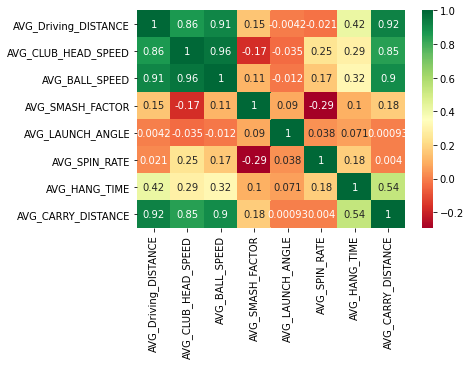

In [82]:
sns.heatmap(driving_dist_factors_df, annot = True, cmap = 'RdYlGn')

plt.show()

**Visualizations:**

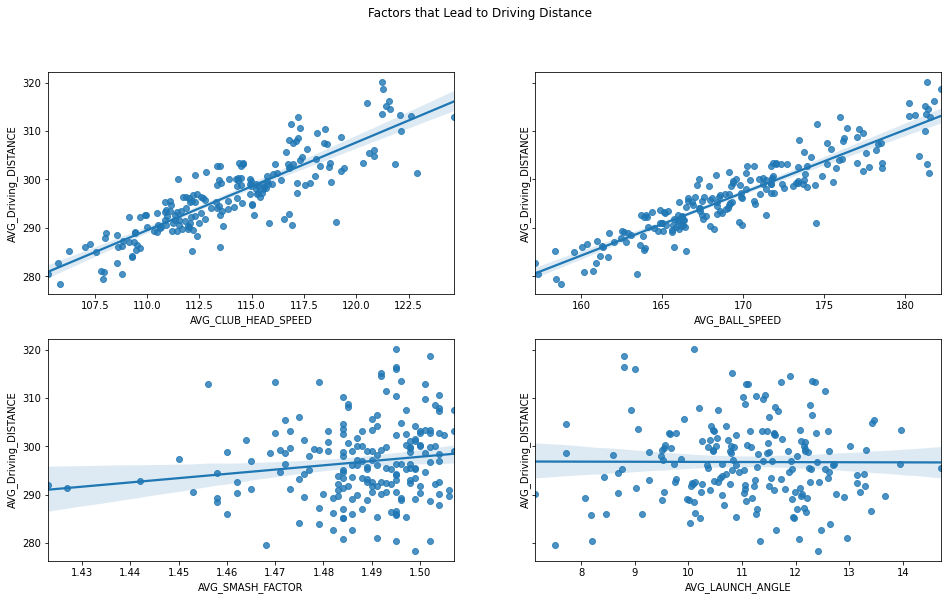

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9), sharey=True)
fig.suptitle('Factors that Lead to Driving Distance')

#AVG_CLUB_HEAD_SPEED
sns.regplot(ax=axes[0,0], data = df, x = 'AVG_CLUB_HEAD_SPEED', y='AVG_Driving_DISTANCE')

#AVG_BALL_SPEED
sns.regplot(ax=axes[0,1], data = df, x = 'AVG_BALL_SPEED', y='AVG_Driving_DISTANCE')

#AVG_SMASH_FACTOR
sns.regplot(ax=axes[1,0], data = df, x = 'AVG_SMASH_FACTOR', y='AVG_Driving_DISTANCE')

#AVG_LAUNCH_ANGLE
sns.regplot(ax=axes[1,1], data = df, x = 'AVG_LAUNCH_ANGLE', y='AVG_Driving_DISTANCE')

plt.show()



*   Easily see the positive correlation with driving distance and club head speed as well as ball speed
*   Smash factor has slight uptrend with driving distance 
*   Launch angle appears to have no effect on driving distance 



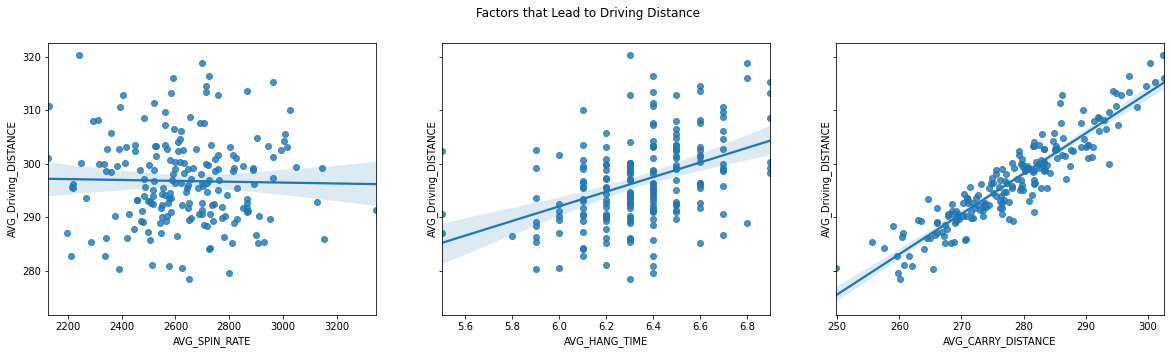

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Factors that Lead to Driving Distance')

#AVG_SPIN_RATE
sns.regplot(ax=axes[0], data = df, x = 'AVG_SPIN_RATE', y='AVG_Driving_DISTANCE')

#AVG_HANG_TIME
sns.regplot(ax=axes[1], data = df, x = 'AVG_HANG_TIME', y='AVG_Driving_DISTANCE')

#AVG_CARRY_DISTANCE
sns.regplot(ax=axes[2], data = df, x = 'AVG_CARRY_DISTANCE', y='AVG_Driving_DISTANCE')


plt.show()



*   We see a positive correlation with driving distance and hang time as well as carry distance

*   There is no correlation between driving distance and spin rate 



